In [1]:
import pandas as pd
from functools import reduce
import json , pandas as pd, numpy as np , networkx as nx 
import ast
import spotipy

In [2]:
file_path = 'sentiment_data.pkl'
df = pd.read_pickle(file_path)
df

,track_name,track_id,explicit,artist_names,artist_ids,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,popular_artist,popular_artist_id,combined_genres,lyrics,sentiments
0,Shotgun,4ofwffwvvnbSkrMSCKQDaC,False,[George Ezra],[2ysnwxxNtSgbb9t1m2Ur4j],0.2860,0.673,0.735,0.00000,0.242,-4.733,0.0457,115.744,George Ezra,2ysnwxxNtSgbb9t1m2Ur4j,"[folk-pop, neo-singer-songwriter]",Homegrown alligator\nSee you later\nGotta hit ...,"[0.062261879444122314, 0.10762041062116623, 0...."
1,Miravi,2ssvA9HSGxaWAek1S2afbH,False,[Soli (Soliman Vaseghi)],[20JGDHGeqDV9HaaoDpUFQK],0.8780,0.460,0.590,0.00000,0.230,-12.732,0.0346,154.924,Soli (Soliman Vaseghi),20JGDHGeqDV9HaaoDpUFQK,[],حال که دیوانه شدم ، می روی\nبی سر و سامانه شدم...,"[0.11398503929376602, 0.13223107159137726, 0.2..."
2,Bello Belisimmo,0khhnIB1aqU6emDCXONkQD,True,"[Krisko, Homiez Clique]","[4oopAFtLdKXCoq2XoEjDZD, 00eWmLCL4w3ISciGAydSS4]",0.1490,0.958,0.618,0.00000,0.034,-8.786,0.3310,104.061,Krisko,4oopAFtLdKXCoq2XoEjDZD,"[bulgarian hip hop, bulgarian pop, chalga]",Кво стаа София? (yea)\nСтолични наркотици (ай)...,"[0.06204673647880554, 0.0931626558303833, 0.28..."
3,ELLE SAIT,5erH8ainax63isS82Ahoty,True,[kobzx2z],[1e1A7s86U6f7cyJAivpfY3],0.2120,0.642,0.595,0.00508,0.156,-8.324,0.0315,98.027,kobzx2z,1e1A7s86U6f7cyJAivpfY3,[speed up turkce],"Elle sait que j'm'en remettrai jamais, j'm'en ...","[0.02467518486082554, 0.012875158339738846, 0...."
4,Chega,01mw8dztHKWqzhCySgKllc,False,[Eduardo Costa],[2OUgs5INWK2UEvZ6amWiJr],0.4470,0.690,0.731,0.00000,0.343,-5.080,0.0353,110.083,Eduardo Costa,2OUgs5INWK2UEvZ6amWiJr,"[sertanejo pop, sertanejo universitario, serta...",Chega\r\nDe viver humilhado tentando mostrar-t...,"[0.11756470054388046, 0.11561193317174911, 0.1..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24980,Dhadkan,3U3Z35w2bnRUJ1coau5Bgj,False,[Danny B],[2QDlNUfkILszgM1UhhaG9a],0.1660,0.513,0.490,0.00000,0.202,-8.408,0.0757,79.863,Danny B,2QDlNUfkILszgM1UhhaG9a,[],NaN,"[0, 0, 0, 0, 0, 0, 0]"
24981,Hold My Breath,6vmk2FBXwYiiicPUJ5lXuD,False,"[Paper Idol, ufo ufo]","[6dewigIOIcG6m1XGsG4Mc3, 1TsvuGn3XJ4F04fRavTonu]",0.0345,0.665,0.683,0.00257,0.326,-6.716,0.0490,130.016,Paper Idol,6dewigIOIcG6m1XGsG4Mc3,[la pop],Break down every single notion\nWe had poetry ...,"[0.1377216875553131, 0.016451815143227577, 0.6..."
24982,Solta Minha Blusa,5i91iDdOjC7sexvXV3MlRc,True,"[pumapjl, SonoTWS]","[1iVZ4G8loVE1bb5EWuOvMM, 4V6S8Exb51yXRs6oiJYIgE]",0.2500,0.748,0.741,0.00000,0.135,-7.749,0.1270,96.010,pumapjl,1iVZ4G8loVE1bb5EWuOvMM,"[drill brasileiro, lo-fi brasileiro]","Banho de mar, mano\r\nQual foi?\r\nBanho de ma...","[0.11368416994810104, 0.04724639654159546, 0.1..."
24983,Geralt Of Rivia,5tmhUzJuP7XwqCHglyqnt8,False,[Marcin Przybyłowicz],[07vycW8ICLf5hKb22PFWXw],0.4510,0.258,0.569,0.95600,0.110,-12.678,0.0510,85.015,Marcin Przybyłowicz,07vycW8ICLf5hKb22PFWXw,"[video game music, orchestral soundtrack]",NaN,"[0, 0, 0, 0, 0, 0, 0]"


In [3]:
df[df["track_name"] == "Perfect"]

,track_name,track_id,explicit,artist_names,artist_ids,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,popular_artist,popular_artist_id,combined_genres,lyrics,sentiments
954,Perfect,0tgVpDi06FyKpA1z0VMD4v,False,[Ed Sheeran],[6eUKZXaKkcviH0Ku9w2n3V],0.16300,0.599,0.448,0.000000,0.1060,-6.312,0.0232,95.050,Ed Sheeran,6eUKZXaKkcviH0Ku9w2n3V,"[pop, uk pop, singer-songwriter pop]","I found a love for me\r\nDarling, just dive ri...","[0.027572641149163246, 0.016424331814050674, 0..."
9417,Perfect,4j3X4KX8rURekAVIFUhI23,False,[Simple Plan],[2p4FqHnazRucYQHyDCdBrJ],0.02730,0.494,0.672,0.000000,0.1050,-4.877,0.0405,156.208,Simple Plan,2p4FqHnazRucYQHyDCdBrJ,"[canadian pop punk, modern rock, canadian punk...","Hey, Dad, look at me\r\nThink back, and talk t...","[0.02898380719125271, 0.014020385220646858, 0...."
10066,Perfect,5jbDih9bLGmI8ycUKkN5XA,True,[Logic],[4xRYI6VqpkE3UwrDrAZL8L],0.00948,0.769,0.829,0.000067,0.3010,-5.228,0.0661,159.943,Logic,4xRYI6VqpkE3UwrDrAZL8L,"[pop rap, hip hop, conscious hip hop, rap]","Bitch, I did it, I made it, I'm loved and I'm ...","[0.24837571382522583, 0.40241435170173645, 0.0..."
17545,Perfect,2ir98K9reYP5iiHKLeeoXt,False,[Hedley],[6Shas1ACrMl25XHgTrzxeo],0.10200,0.428,0.854,0.000000,0.0953,-4.509,0.0564,153.240,Hedley,6Shas1ACrMl25XHgTrzxeo,"[pop quebecois, canadian rock, canadian pop]",You're whole lotta crazy\nI think you like it ...,"[0.2929106056690216, 0.10094375163316727, 0.15..."


In [4]:
class GenreRecommender():
    def __init__(self):
        self.song_data_filepath = "song_data/filtered_songdata.json"
        with open(self.song_data_filepath,'r',encoding='utf-8') as f: self.song_data = json.loads(f.read())

        self.song_genre_dict = { d['SongID'] : list(set(d['SongData']['genre']+d['SongData']['artists'][0]['genre'])) for d in self.song_data}
        self.songs = sorted(list(set([x['SongID'] for x in self.song_data])))
        self.genres = sorted(list(set(reduce(lambda x,y: x+y , [x['SongData']['genre'] + x['SongData']['artists'][0]['genre'] for x in self.song_data]))))
        self.num_songs = len(self.songs)
        self.num_genres = len(self.genres)

        self.graph = nx.Graph()
        self.graph.add_nodes_from(self.songs)
        self.graph.add_nodes_from(self.genres)
        for a,b in self.song_genre_dict.items():
            for g in b:
                self.graph.add_edge(a,g)
    def genreSim(self,songid1 , songid2):
        a1 = set(self.graph.neighbors(songid1))
        a2 = set(self.graph.neighbors(songid2))
        return 1 - np.exp(-3/2*len(a1.intersection(a2)))
genre_rec = GenreRecommender()

In [5]:
class ArtistRecommender():
    def __init__(self,song_data_filepath):
        self.song_data_filepath = song_data_filepath
        with open(self.song_data_filepath,'r',encoding='utf-8') as f: self.song_data = json.loads(f.read())
        self.song_artist_dict = { d['SongID'] : [artistdet['id'] for artistdet in d['SongData']['artists']] for d in self.song_data}
        self.artist_ids = set(reduce(lambda x,y:x+y , [[artistdet['id'] for artistdet in d['SongData']['artists']] for d in self.song_data]))
        self.artist_relations = None

    def getArtistRelationFromSpotify(self,spotify_creds,savefilename):
        sp = spotipy.Spotify(client_credentials_manager=SpotifyClientCredentials(spotify_creds[0],spotify_creds[1]))
        with open(savefilename,'r+',encoding='utf-8') as filesaver : self.edgelist = json.loads(filesaver.read())['edges']
        print("EdgeList loaded : ", len(self.edgelist))
        temp_edges = []
        for idx , artistid in enumerate(self.artist_ids):
            print(f"Sn. {idx+1} ,{artistid:24}", end=" ")
            while True:
                data = sp.artist_related_artists(artist_id=artistid)
                if 'error' in data.keys():
                    print(data,flush=True)
                    print(data['error']['status'],flush=True)
                    time.sleep(3)
                    continue
                filtered_data = [d['id'] for d in data['artists'] if d['id'] in self.artist_ids]
                temp_edges += list(map(lambda x: sorted([artistid,x]) , filtered_data))
                print(f"{len(filtered_data)} entries ", filtered_data )
                if (idx%10 == 0):
                    self.edgelist = self.edgelist + temp_edges
                    temp_edges = []
                    with open(savefilename,'w',encoding='utf-8') as f: f.write(json.dumps({'edges':self.edgelist}))
                break  
        self.edgelist += temp_edges
        with open(savefilename,'w',encoding='utf-8') as f: f.write(json.dumps({'edges':self.edgelist}))
        

    def getArtistRelationFromFile(self,filename):
        with open(filename,'r',encoding='utf-8') as f: self.artist_relations = json.loads(f.read())
        self.graph = nx.Graph()
        self.graph.add_nodes_from(self.artist_ids)
        self.graph.add_edges_from(self.artist_relations['edges'])

    def artistSim(self,artistid1,artistid2):
        translate = lambda x : np.exp(-x/6)
        if self.graph.has_node(artistid1) and self.graph.has_node(artistid2) and nx.has_path(self.graph,artistid1,artistid2) :
            return translate(nx.shortest_path_length(self.graph,artistid1,artistid2))
        else: return 0

artist_rec = ArtistRecommender('song_data/filtered_songdata.json')
artist_rec.getArtistRelationFromFile('song_data/artist_edges.json')

In [6]:
def individual_index_similarity(vec1, vec2):
    similarities = [abs(a - b) / max(abs(a), abs(b)) if max(abs(a), abs(b)) != 0 else 1 for a, b in zip(vec1, vec2)]
    return np.mean(similarities)

def get_row_by_id(track_id):
    return df[df['track_id'] == track_id]

def cos_sim_sentim (vec1 , vec2) : 
    return np.dot(vec1 , vec2) / (np.linalg.norm(vec1) * np.linalg.norm(vec2))
    
def senti_list (row) : 
    sentiment = row.loc[: ,"sentiments"].item()
    return ast.literal_eval(sentiment)

def get_sp_analysis_feat(row): 
    cols_to_consider = ['acousticness', 'danceability', 'energy', 'instrumentalness', 'liveness', 'loudness', 'speechiness', 'tempo']
    return [row.loc[: , i].item() for i in cols_to_consider]


In [8]:
def final_sim_func(id1 , id2) : 
    senti_abnt = 0
    sp_1 = 0
    
    row1 = get_row_by_id(id1)
    row2 = get_row_by_id(id2)
    
    artist_sim = 1 - artist_rec.artistSim(row1.loc[: ,"artist_ids"].values,row2.loc[: ,"artist_ids"].values)
    genre_sim = genre_rec.genreSim(id1, id2)
    try : 
        sentiment_1 = senti_list (row1)
        sentiment_2 = senti_list (row2)
        sent_sim = cos_sim_sentim(sentiment_1 , sentiment_2)
        if sentiment_1 == str([0,0,0,0,0,0,0]) or sentiment_2 == str([0,0,0,0,0,0,0]) : 
            senti_abnt = 1
    except :
        senti_abnt = 1
        

    try : 
        analysis_feat_1 = get_sp_analysis_feat(row1)
        analysis_feat_2 = get_sp_analysis_feat(row2)
        sp_audio_feat_sim = individual_index_similarity(analysis_feat_1 , analysis_feat_2)
    except :
        sp_1 = 1

    genre_s = 0.4
    artist_s = 0.35
    sent_s = 0.15
    sp_audio_feat_s = 0.1

    if senti_abnt == 0 and sp_1 == 0: 
        pass
    
    elif senti_abnt == 1 and sp_1 == 0: 
        artist_s = 0.3 
        sent_s = 0
        sp_audio_feat_sim = 0.3 

    if sp_1 == 0 and senti_abnt == 1: 
        genre_s = 0.4
        artist_s = 0.4
        sp_audio_feat_s = 0.2

    elif senti_abnt == 1 and senti_abnt == 1 : 
        genre_s = 0.5
        artist_s = 0.5

    if senti_abnt == 1 : 
        sent_sim = 0
        
    if sp_1 == 1 : 
        sp_audio_feat_sim = 0 

    weighted_metric =  genre_s * genre_sim + artist_s * artist_sim + sent_s * sent_sim + sp_audio_feat_s * sp_audio_feat_sim
    # if senti_abnt == 0 : 
    #     weighted_metric = 0.4 * genre_sim +  0.35 * artist_sim + 0.15 * sent_sim + 0.1 * sp_audio_feat_sim
    # elif senti_abnt == 1 : 
    #     weighted_metric = 0.4 * genre_sim +  0.3 * artist_sim +  0.3 * sp_audio_feat_sim

    return weighted_metric

In [9]:
id1 = "0tgVpDi06FyKpA1z0VMD4v"
id2 = "1Slwb6dOYkBlWal1PGtnNg"

final_sim_func(id1, id2)

0.8848668878819579

In [ ]:
import matplotlib.pyplot as plt
class TestAccuracy():
    def __init__(self,selected_users_filepath,full_df_pickle_path, simfunc):
        self.simfunc = simfunc
        self.selected_users_filepath = selected_users_filepath
        self.full_df_pickle_path = full_df_pickle_path
        with open(self.selected_users_filepath,'r',encoding='utf-8') as f: self.user_data = json.loads(f.read())[:1000]
        self.full_df = pd.read_pickle(self.full_df_pickle_path)
        self.all_user_similarity = None

    def getavgSimilarityScore(self ,song_ids : list[str]):
        target = song_ids[-1]
        return np.array([self.simfunc(target,comparasion_song) for comparasion_song in song_ids]).mean()

    def getAllUserSimilarity(self):
        self.all_user_similarity = [self.getavgSimilarityScore(user['SongIDs']) for user in self.user_data]
        self.similarity_at_thresholds = [sum(map(lambda t : t>x/100,self.all_user_similarity))/len(self.user_data) for x in range(100)]
        return self.similarity_at_thresholds

tester = TestAccuracy('song_data/selected_users.json','sentiment_data.pkl',final_sim_func)
thresh_values = tester.getAllUserSimilarity()
# f = plt.figure()
# f.set_figwidth(10)
# f.set_figheight(10)
# plt.plot(range(1,101) , thresh_values ,c='violet',label="Accuracy at threshold %")
# plt.legend(loc='upper right')
# plt.xlabel("Threshold [%]")
# plt.ylabel("Accuracy")
# plt.show()

<Figure size 640x480 with 0 Axes>

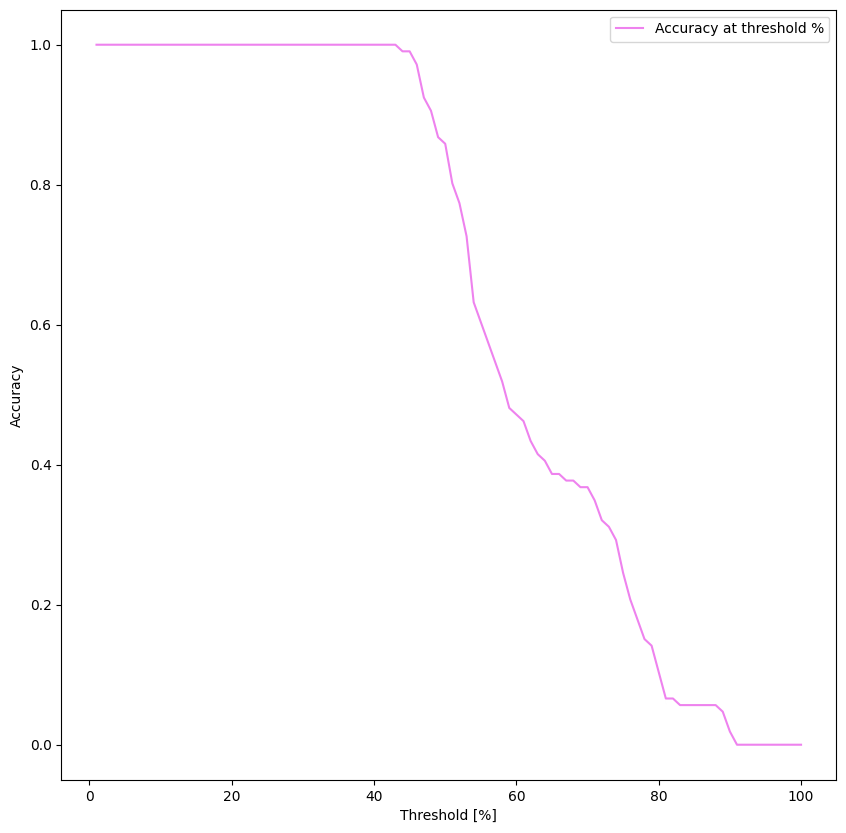

<Figure size 640x480 with 0 Axes>

In [19]:
f = plt.figure()
f.set_figwidth(10)
f.set_figheight(10)
plt.plot(range(1,101) , thresh_values ,c='violet',label="Accuracy at threshold %")
plt.legend(loc='upper right')
plt.xlabel("Threshold [%]")
plt.ylabel("Accuracy")
plt.show()
plt.savefig('final_grap1.svg')